In [30]:
# Import libraries needed,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **Dataset Source**

This dataset is from UCI Machine Learning Repository. The dataset is "Diabetes 130-US hospitals for years 1999-2008 Data Set".


# **Dataset Desciption**

The dataset contains the subset of about 100,000 individual encounters from the overall 74 million encounters related to 17 million patients. The data was collected for a period of 10 years (1999 to 2008) and contains several attributes which correspond to patient demographic and treatments provided to the diabetic patients. The original dataset  has  55  attributes  and  101,731 observations.  The dataset contains the records that satisfied the following criteria. Firstly, it should be an inpatient encounter. Secondly, it should have been a diabetic encounter which involved diabetes entered in the system as a diagnosis. Thirdly, the length of the stay should be between 1 day and 14 days. Fourthly, laboratory test should have been performed during the encounter. Finally, medication should have been administered during the encounter.


# **Motivation for this Analysis**

According to  Centers for  Medicare  &  Medicaid  Services  (CMS), one of the  major  issues  faced  by  our  healthcare  system  is  approximately  $15  billion  per  year was spent on treating readmitted patients.  Readmission costs Medicare huge expenses which is close to twice as much as an episode without readmission. To better tackle this situation,  it is mandatory for the hospital to declare readmission cases publicly and those with high readmissions must pay a reimbursement penalty as well. The penalty for readmission in 2014 for many hospitals were a minimum of 3% of their Medicare readmission. To better tackle this situation and improve patient health outcomes, it would be hugely beneficial for the hospitals to identify the factors which leads to readmission cases so that personalized intervention can be provided to patient at risk which will yield better health outcome, decreased length of stay and reduced rate of readmission.


Importing the Dataset

In [4]:
folder_path = 'C:\\Users\\Prajwal\\Documents\\Python Scripts\\Dataset\\dataset_diabetes_diabetic_data.csv'
diabetes_df = pd.read_csv(folder_path)

In [7]:
diabetes_df.shape

(101766, 50)

In [6]:
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [12]:
diabetes_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Replace "?" with NaN

In [10]:
missing = diabetes_df.replace('?', np.NaN) 

In [11]:
missing .isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

We can see that "Weight", "Payer Code", "Medical Speciality" has over 75% missing values. So we can remove these columns.

In [14]:
final_diabetes_df= diabetes_df.drop(['weight','payer_code','medical_specialty'],axis=1)

Dropping all rows with missing values.

In [15]:
final_diabetes_df.dropna(inplace=True)

Let's check the distribution of the response variable

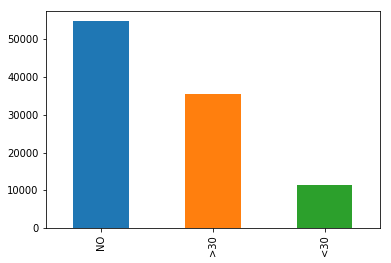

In [19]:
final_diabetes_df['readmitted'].value_counts().plot(kind='bar')
plt.show()

Since we are interested only if the patient has been readmitted or not, we can transform this variable into 0 (Not readmitted) and 1 (Readmitted)

In [20]:
final_diabetes_df['readmitted']= np.where(final_diabetes_df['readmitted']== 'NO', 0, 1)

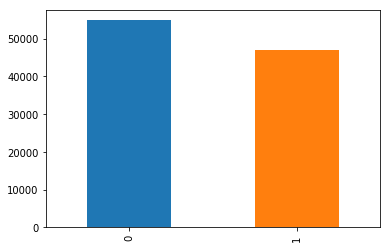

In [21]:
final_diabetes_df['readmitted'].value_counts().plot(kind='bar')
plt.show()

# **Data Cleaning and Transformation**

We can see that "Race", "Weight", "Payer Code", "Medical Speciality", "Diag_1", "Diag_2" and "Diag_3" have missing values.

The percentage of missing value is over 70% in  "Weight", "Payer Code", "Medical Speciality" and hence these columns were removed. For the other missing values, only the row containg the missing values were removed.

The response variable, Readmitted, was transformed from three levels (<30, >30 and NO) to two level 1 and 0 (Readmitted and Not Readmitted)

In [22]:
categorical = final_diabetes_df.select_dtypes(include=['object'])
numeric = final_diabetes_df.select_dtypes(exclude=['object'])

Plotting the bar graph for all the categorical values

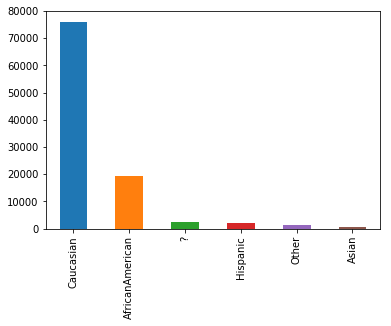

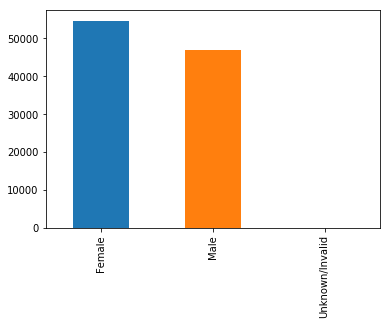

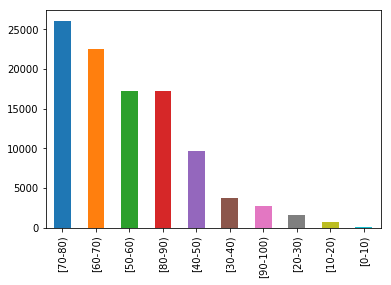

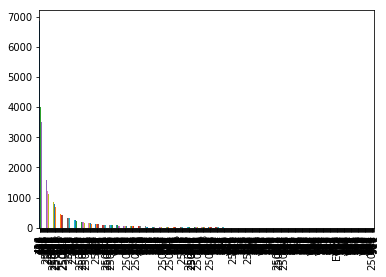

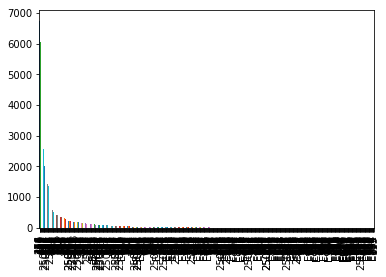

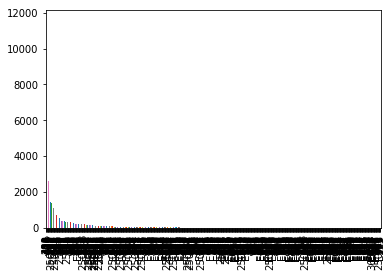

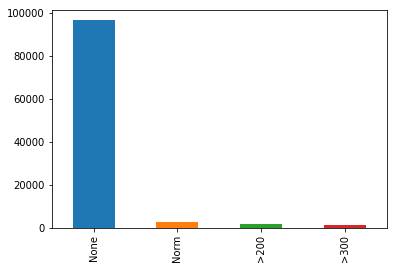

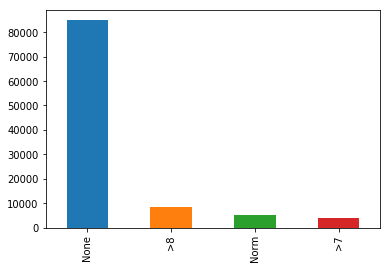

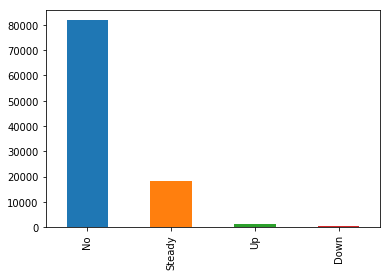

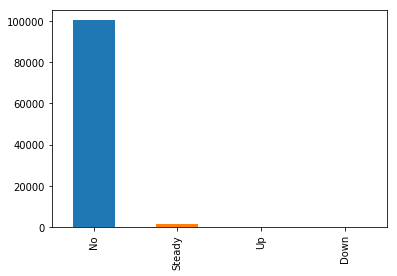

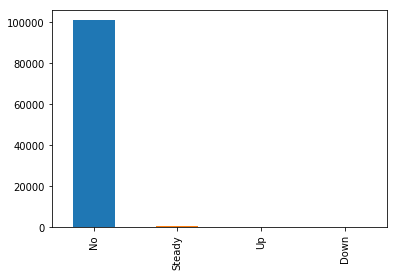

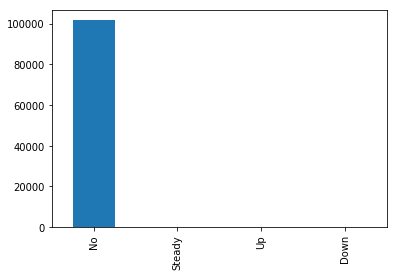

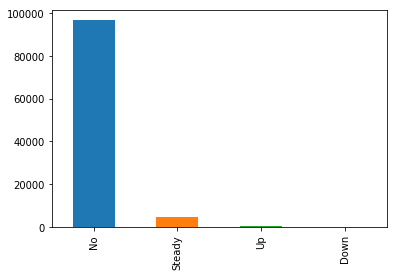

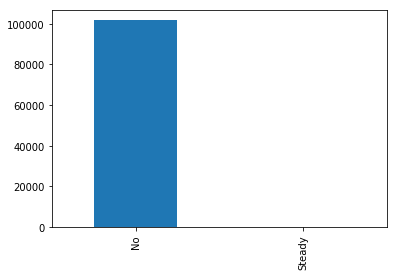

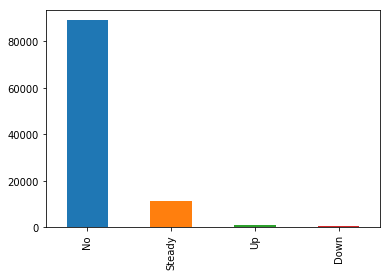

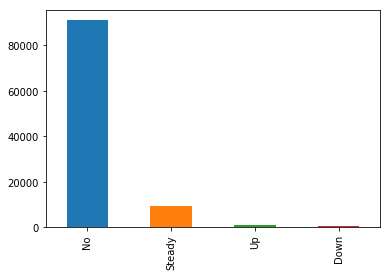

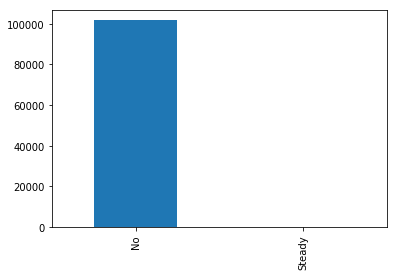

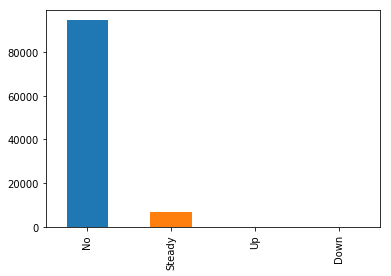

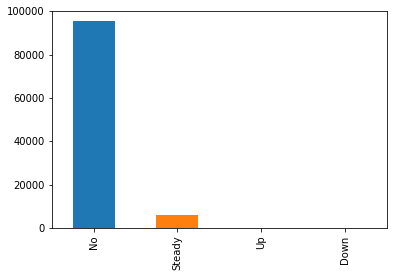

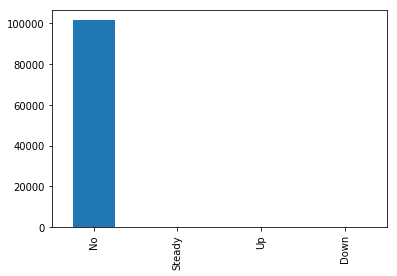

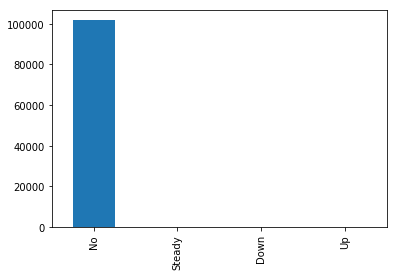

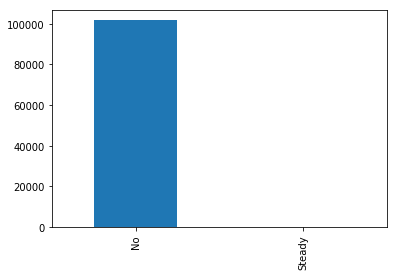

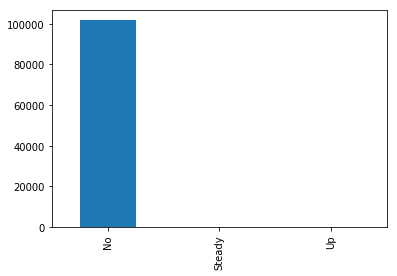

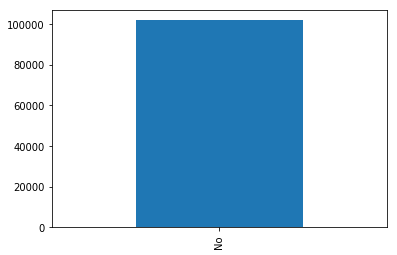

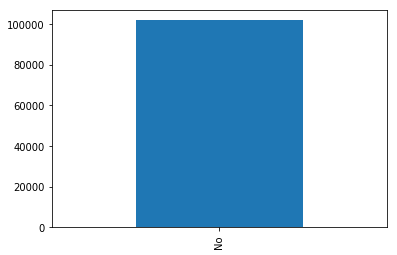

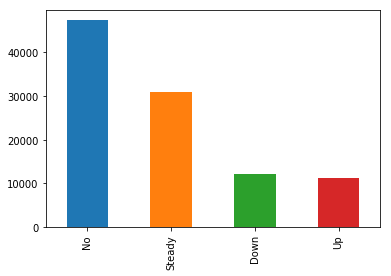

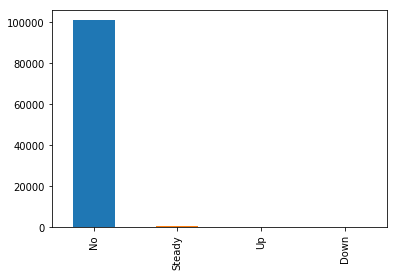

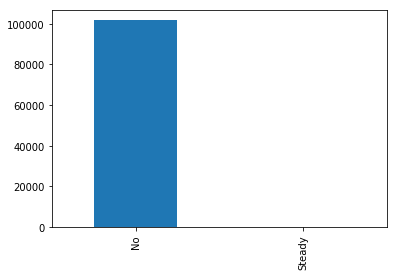

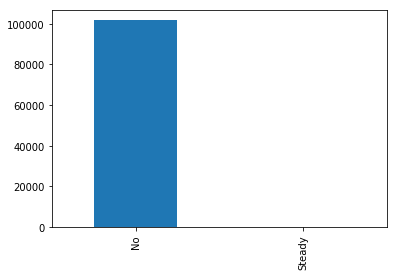

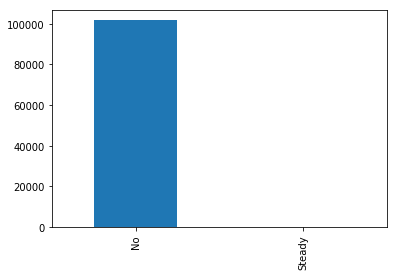

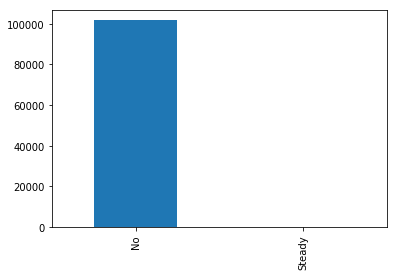

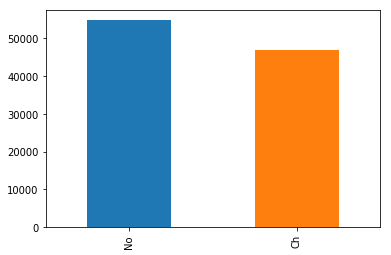

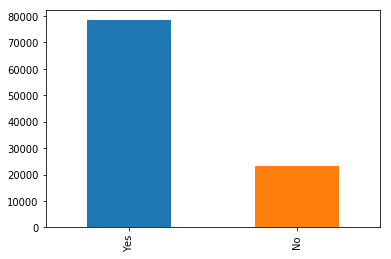

In [31]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

Plotting the Histogram of the numerical values in the dataset.

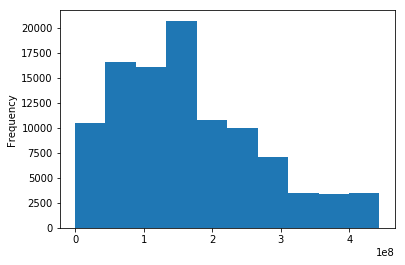

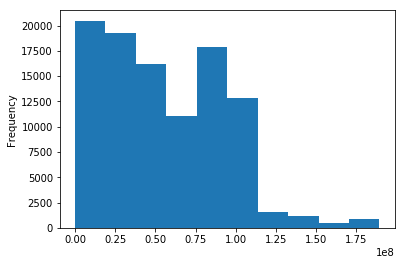

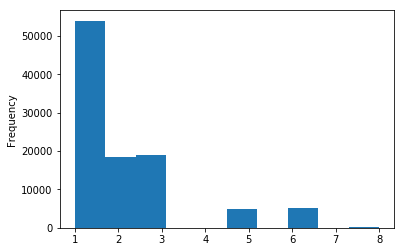

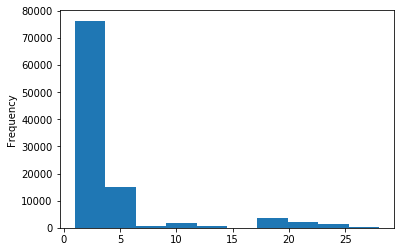

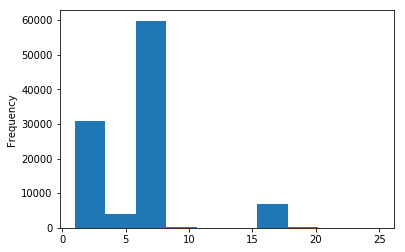

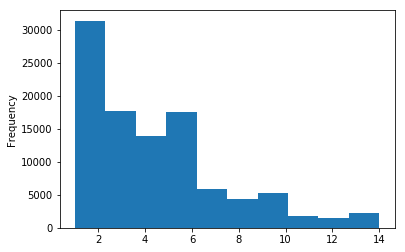

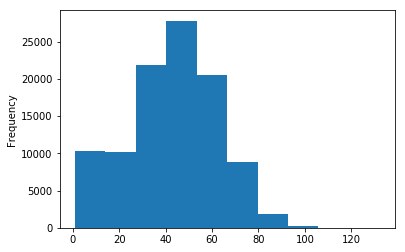

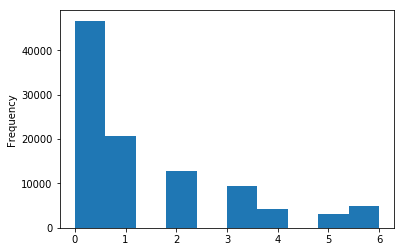

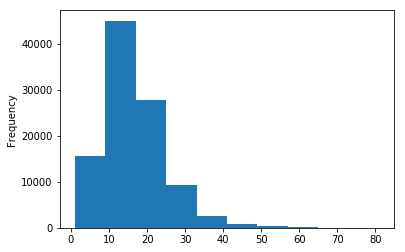

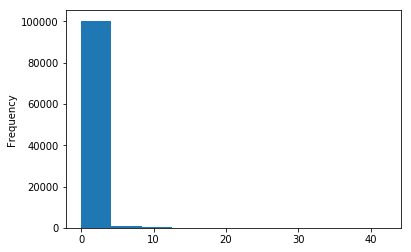

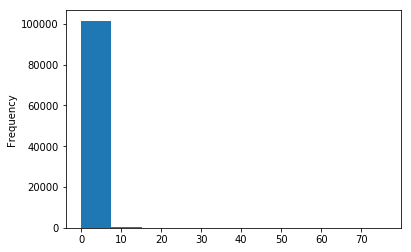

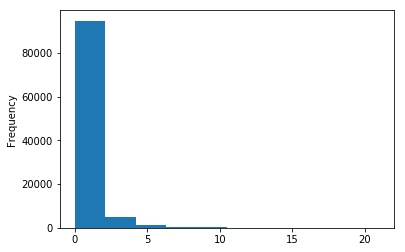

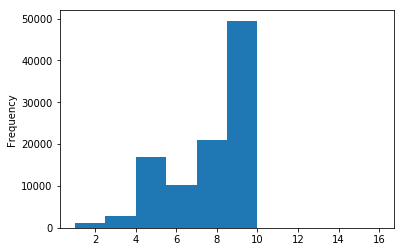

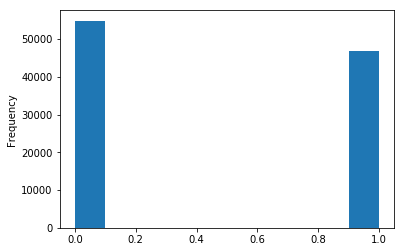

In [32]:
for col in numeric:
    numeric[col].plot.hist(bins=10)
    plt.show()

Plotting the relationship between Number of procedure, Number of Medications and Number of Emergency

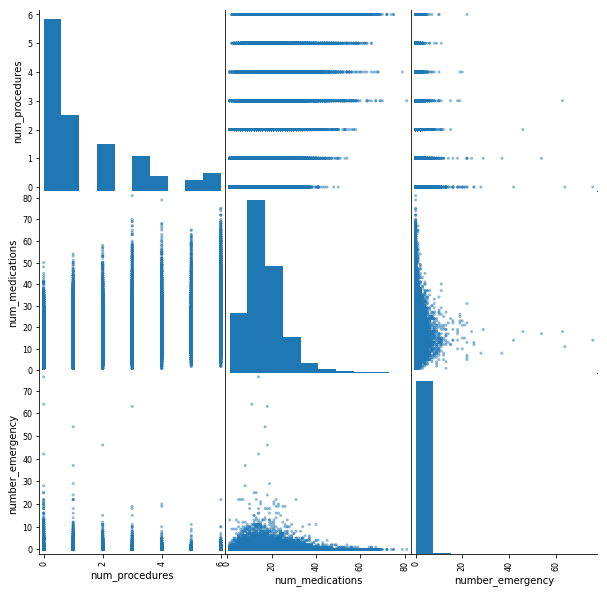

In [29]:
pd.plotting.scatter_matrix(final_diabetes_df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (10, 10))
sns.despine()

Plotting the relationship between gender and readmission

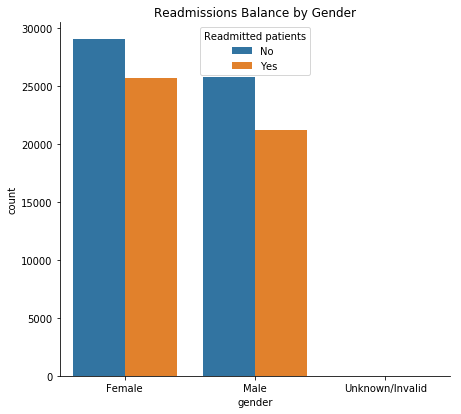

In [34]:
pl1 = sns.countplot(x = 'gender', hue = 'readmitted', data = final_diabetes_df) 
sns.despine()
pl1.figure.set_size_inches(7, 6.5)
pl1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
pl1.axes.set_title('Readmissions Balance by Gender')
plt.show()

Plotting the relationship between age and readmission

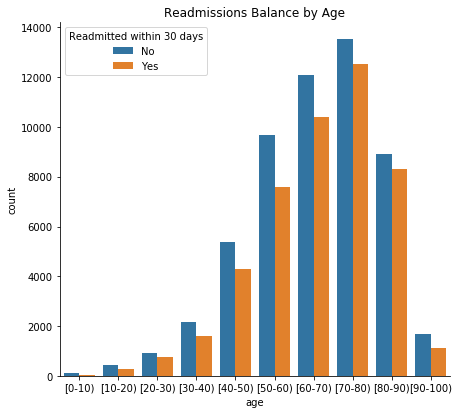

In [37]:
ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = final_diabetes_df )
sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

Plotting the relationship between Number of Procedures and readmission

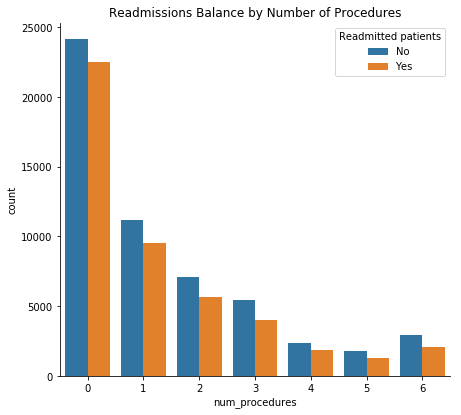

In [39]:
pl2 = sns.countplot(x = 'num_procedures', hue = 'readmitted', data = final_diabetes_df) 
sns.despine()
pl2.figure.set_size_inches(7, 6.5)
pl2.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
pl2.axes.set_title('Readmissions Balance by Number of Procedures')
plt.show()

Plotting the relationship between Number of Emergency and readmission

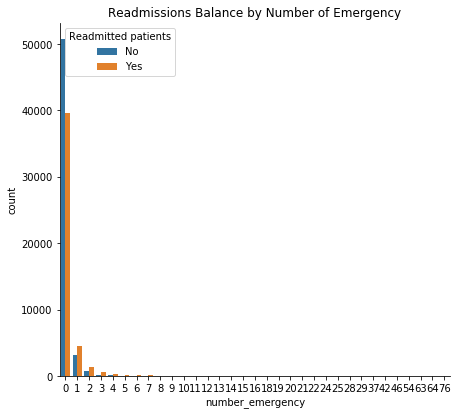

In [41]:
pl3 = sns.countplot(x = 'number_emergency', hue = 'readmitted', data = final_diabetes_df) 
sns.despine()
pl3.figure.set_size_inches(7, 6.5)
pl3.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
pl3.axes.set_title('Readmissions Balance by Number of Emergency')
plt.show()

Plotting the relationship between Number of Medications and readmission

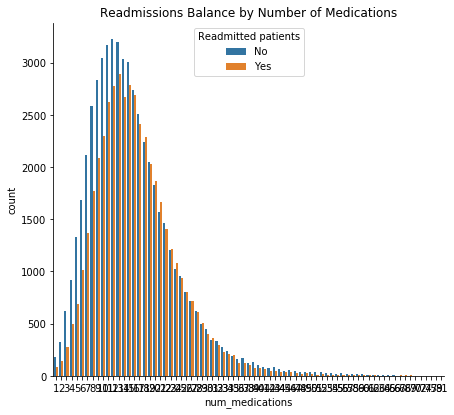

In [42]:
pl4 = sns.countplot(x = 'num_medications', hue = 'readmitted', data = final_diabetes_df) 
sns.despine()
pl4.figure.set_size_inches(7, 6.5)
pl4.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
pl4.axes.set_title('Readmissions Balance by Number of Medications')
plt.show()

# **Insights**

- We can see from these plots that readmission cases are higher for females than for male patients. 
- It can be noticed that the readmission cases are highest amoung the patients with age range from 70- 80 years.
- The higher the number of previous emergency hospitalization, the higher is the risk of readmisison
- As the number of procedure performed on the patient increases, the greater is the risk of readmission.

